In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = 'tight'

In [2]:
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
iris = load_iris()

In [3]:
X, y = iris.data, iris.target
X, y = shuffle(X, y)

In [4]:
print(X[:30])

[[6.8 3.2 5.9 2.3]
 [5.4 3.  4.5 1.5]
 [5.5 2.3 4.  1.3]
 [6.1 2.8 4.  1.3]
 [5.8 2.7 3.9 1.2]
 [5.  3.3 1.4 0.2]
 [5.8 2.7 5.1 1.9]
 [4.6 3.1 1.5 0.2]
 [7.2 3.2 6.  1.8]
 [5.6 3.  4.5 1.5]
 [6.3 2.5 5.  1.9]
 [5.4 3.9 1.7 0.4]
 [6.9 3.1 5.1 2.3]
 [5.  3.5 1.3 0.3]
 [5.5 4.2 1.4 0.2]
 [5.  3.2 1.2 0.2]
 [6.7 3.3 5.7 2.1]
 [5.6 2.7 4.2 1.3]
 [5.1 3.8 1.5 0.3]
 [6.  2.7 5.1 1.6]
 [4.5 2.3 1.3 0.3]
 [5.8 4.  1.2 0.2]
 [6.2 2.9 4.3 1.3]
 [5.2 4.1 1.5 0.1]
 [5.7 3.8 1.7 0.3]
 [6.4 2.8 5.6 2.2]
 [6.3 2.7 4.9 1.8]
 [5.7 2.8 4.1 1.3]
 [4.9 3.1 1.5 0.2]
 [5.7 3.  4.2 1.2]]


In [5]:
X.shape

(150, 4)

In [6]:
# a column is mostly missing
rng = np.random.RandomState(0)
X_missing_column = X.copy()
mask = X.sum(axis=1) < rng.normal(loc=19, scale=3, size=X.shape[0])
X_missing_column[mask, 0] = np.NaN
X_missing_column[120:]

array([[nan, 3. , 1.1, 0.1],
       [nan, 3.2, 1.4, 0.2],
       [nan, 2.9, 6.3, 1.8],
       [nan, 3. , 4.1, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [nan, 2.8, 4.8, 1.8],
       [nan, 3.2, 4.7, 1.4],
       [nan, 3. , 4.2, 1.5],
       [nan, 2.6, 4.4, 1.2],
       [nan, 2.6, 3.5, 1. ],
       [6.5, 3. , 5.2, 2. ],
       [nan, 2.9, 4.5, 1.5],
       [6.9, 3.1, 5.4, 2.1],
       [nan, 2.8, 5.1, 1.5],
       [nan, 2.6, 4. , 1.2],
       [nan, 2.5, 3.9, 1.1],
       [nan, 3.1, 5.5, 1.8],
       [nan, 3.2, 1.3, 0.2],
       [nan, 3.2, 5.7, 2.3],
       [6.5, 3. , 5.8, 2.2],
       [nan, 3.5, 1.4, 0.2],
       [nan, 2.8, 4.6, 1.5],
       [nan, 2.4, 3.8, 1.1],
       [nan, 3.4, 4.5, 1.6],
       [nan, 3.1, 4.7, 1.5],
       [nan, 3.3, 5.7, 2.5],
       [6.4, 2.8, 5.6, 2.1],
       [nan, 3.6, 6.1, 2.5],
       [nan, 2.4, 3.3, 1. ],
       [nan, 2.7, 5.3, 1.9]])

In [7]:
print(mask)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True False  True False  True
  True  True  True  True False  True False  True  True  True False  True
 False  True  True  True False  True  True  True  True  True  True  True
  True  True  True False  True False False  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True False
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True False  True
 False  True  True  True  True  True  True False  True  True  True  True
  True  True False  True  True  True]


In [8]:
# only a few rows have missing data. but a lot of it
rng = np.random.RandomState(4)
X_missing_rows = X.copy()
for i in rng.randint(0, 30, 5):
    X_missing_rows[i, rng.uniform(size=4)> .2] = np.NaN
X_missing_rows[:30]

array([[6.8, 3.2, 5.9, 2.3],
       [nan, nan, 4.5, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.1, 2.8, 4. , 1.3],
       [5.8, 2.7, 3.9, 1.2],
       [nan, nan, nan, nan],
       [5.8, 2.7, 5.1, 1.9],
       [4.6, 3.1, 1.5, 0.2],
       [7.2, 3.2, 6. , 1.8],
       [5.6, 3. , 4.5, 1.5],
       [6.3, 2.5, 5. , 1.9],
       [5.4, 3.9, 1.7, 0.4],
       [6.9, 3.1, 5.1, 2.3],
       [5. , 3.5, 1.3, 0.3],
       [nan, nan, nan, nan],
       [5. , 3.2, 1.2, 0.2],
       [6.7, 3.3, 5.7, 2.1],
       [5.6, 2.7, 4.2, 1.3],
       [5.1, 3.8, 1.5, 0.3],
       [6. , 2.7, 5.1, 1.6],
       [4.5, 2.3, 1.3, 0.3],
       [5.8, 4. , 1.2, 0.2],
       [6.2, 2.9, 4.3, 1.3],
       [5.2, nan, nan, nan],
       [5.7, 3.8, 1.7, 0.3],
       [6.4, 2.8, 5.6, 2.2],
       [nan, nan, nan, 1.8],
       [5.7, 2.8, 4.1, 1.3],
       [4.9, 3.1, 1.5, 0.2],
       [5.7, 3. , 4.2, 1.2]])

In [9]:
rng.randint(0, 30, 5)


array([ 0,  8, 19, 10, 13])

In [10]:
X[y==2].mean(axis=0)

array([6.588, 2.974, 5.552, 2.026])

In [11]:
# some values missing only
rng = np.random.RandomState(0)
X_some_missing = X.copy()
mask = np.abs(X[:, 2] - rng.normal(loc=5.5, scale=.7, size=X.shape[0])) < .6
X_some_missing[mask, 3] = np.NaN
# different random numbers
mask2 = np.abs(X[:, 2] - rng.normal(loc=5.5, scale=.7, size=X.shape[0])) < .6
X_some_missing[mask2, 2] = np.NaN
X_some_missing[:30]

array([[6.8, 3.2, nan, 2.3],
       [5.4, 3. , 4.5, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.1, 2.8, 4. , 1.3],
       [5.8, 2.7, 3.9, 1.2],
       [5. , 3.3, 1.4, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [4.6, 3.1, 1.5, 0.2],
       [7.2, 3.2, 6. , nan],
       [5.6, 3. , 4.5, 1.5],
       [6.3, 2.5, nan, 1.9],
       [5.4, 3.9, 1.7, 0.4],
       [6.9, 3.1, 5.1, 2.3],
       [5. , 3.5, 1.3, 0.3],
       [5.5, 4.2, 1.4, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [6.7, 3.3, 5.7, 2.1],
       [5.6, 2.7, nan, 1.3],
       [5.1, 3.8, 1.5, 0.3],
       [6. , 2.7, 5.1, nan],
       [4.5, 2.3, 1.3, 0.3],
       [5.8, 4. , 1.2, 0.2],
       [6.2, 2.9, 4.3, 1.3],
       [5.2, 4.1, 1.5, 0.1],
       [5.7, 3.8, 1.7, 0.3],
       [6.4, 2.8, nan, 2.2],
       [6.3, 2.7, nan, 1.8],
       [5.7, 2.8, 4.1, 1.3],
       [4.9, 3.1, 1.5, 0.2],
       [5.7, 3. , 4.2, 1.2]])

In [12]:
np.mean(mask)

0.21333333333333335

In [13]:
np.bincount(y[~mask2])

array([50, 39, 21])

In [14]:
# from now on use X_ = X_some_missing
X_ = X_some_missing

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X_, y, stratify=y, random_state=0)

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

nan_columns = np.any(np.isnan(X_train), axis=0)
X_drop_columns = X_train[:, ~nan_columns]
logreg = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs',multi_class='multinomial'))
scores = cross_val_score(logreg, X_drop_columns, y_train, cv=10)
np.mean(scores)

0.7961111111111112

In [17]:
print(X_train[-30:])

[[6.  2.7 5.1 nan]
 [6.4 3.1 5.5 nan]
 [5.1 3.5 1.4 0.3]
 [5.1 3.5 1.4 0.2]
 [5.  3.4 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [4.5 2.3 1.3 0.3]
 [5.6 2.5 3.9 1.1]
 [5.7 2.5 nan nan]
 [7.2 3.6 nan nan]
 [4.9 2.5 4.5 nan]
 [4.8 3.4 1.6 0.2]
 [6.2 3.4 nan 2.3]
 [5.4 3.9 1.7 0.4]
 [6.9 3.1 5.1 2.3]
 [5.4 3.9 1.3 0.4]
 [5.7 2.6 3.5 1. ]
 [6.4 2.9 4.3 1.3]
 [5.2 2.7 nan 1.4]
 [5.7 2.8 4.5 1.3]
 [4.8 3.  1.4 0.3]
 [6.5 3.  5.8 2.2]
 [7.3 2.9 nan nan]
 [4.6 3.2 1.4 0.2]
 [6.1 2.9 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [5.1 3.4 1.5 0.2]
 [7.2 3.  nan 1.6]
 [6.9 3.1 nan nan]
 [6.5 3.2 nan 2. ]]


In [18]:
np.set_printoptions(precision=3)

In [19]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="mean").fit(X_train)
X_mean_imp = imp.transform(X_train)
X_mean_imp[-30:]

array([[6.   , 2.7  , 5.1  , 0.992],
       [6.4  , 3.1  , 5.5  , 0.992],
       [5.1  , 3.5  , 1.4  , 0.3  ],
       [5.1  , 3.5  , 1.4  , 0.2  ],
       [5.   , 3.4  , 1.5  , 0.2  ],
       [5.   , 3.2  , 1.2  , 0.2  ],
       [4.5  , 2.3  , 1.3  , 0.3  ],
       [5.6  , 2.5  , 3.9  , 1.1  ],
       [5.7  , 2.5  , 3.298, 0.992],
       [7.2  , 3.6  , 3.298, 0.992],
       [4.9  , 2.5  , 4.5  , 0.992],
       [4.8  , 3.4  , 1.6  , 0.2  ],
       [6.2  , 3.4  , 3.298, 2.3  ],
       [5.4  , 3.9  , 1.7  , 0.4  ],
       [6.9  , 3.1  , 5.1  , 2.3  ],
       [5.4  , 3.9  , 1.3  , 0.4  ],
       [5.7  , 2.6  , 3.5  , 1.   ],
       [6.4  , 2.9  , 4.3  , 1.3  ],
       [5.2  , 2.7  , 3.298, 1.4  ],
       [5.7  , 2.8  , 4.5  , 1.3  ],
       [4.8  , 3.   , 1.4  , 0.3  ],
       [6.5  , 3.   , 5.8  , 2.2  ],
       [7.3  , 2.9  , 3.298, 0.992],
       [4.6  , 3.2  , 1.4  , 0.2  ],
       [6.1  , 2.9  , 4.7  , 1.4  ],
       [6.4  , 3.2  , 4.5  , 1.5  ],
       [5.1  , 3.4  , 1.5  , 0.2  ],
 

In [20]:
X_mean_imp.shape

(112, 4)

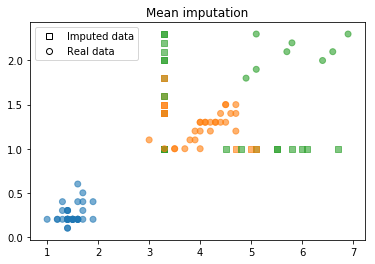

In [21]:
import matplotlib.patches as patches
imputed_mask = np.any(np.isnan(X_train), axis=1)

def plot_imputation(X_imp, title=None, ax=None):
    # helper function to plot imputed data points
    if ax is None:
        ax = plt.gca()
    if title is not None:
        ax.set_title(title)
    ax.scatter(X_imp[imputed_mask, 2], X_imp[imputed_mask, 3], c=plt.cm.tab10(y_train[imputed_mask]), alpha=.6, marker="s")
    ax.scatter(X_imp[~imputed_mask, 2], X_imp[~imputed_mask, 3], c=plt.cm.tab10(y_train[~imputed_mask]), alpha=.6)
    # this is for creating the legend...
    square = plt.Line2D((0,), (0,), linestyle='', marker="s", markerfacecolor="w", markeredgecolor="k", label='Imputed data')
    circle = plt.Line2D((0,), (0,), linestyle='', marker="o", markerfacecolor="w", markeredgecolor="k", label='Real data')
    plt.legend(handles=[square, circle], numpoints=1, loc="best")

plot_imputation(X_mean_imp, "Mean imputation")

In [22]:
mean_pipe = make_pipeline(SimpleImputer(), StandardScaler(), LogisticRegression(solver='lbfgs',multi_class='multinomial'))
scores = cross_val_score(mean_pipe, X_train, y_train, cv=10)
np.mean(scores)

0.8144444444444444

# Model-driven imputation and KNN

In [23]:
# Very inefficient didactic implementation

distances = np.zeros((X_train.shape[0], X_train.shape[0]))
for i, x1 in enumerate(X_train):
    for j, x2 in enumerate(X_train):
        dist = (x1 - x2) ** 2
        nan_mask = np.isnan(dist)
        distances[i, j] = dist[~nan_mask].mean() * X_train.shape[1]
        
neighbors = np.argsort(distances, axis=1)[:, 1:]
n_neighbors = 3

X_train_knn = X_train.copy()
for feature in range(X_train.shape[1]):
    has_missing_value = np.isnan(X_train[:, feature])
    for row in np.where(has_missing_value)[0]:
        neighbor_features = X_train[neighbors[row], feature]
        non_nan_neighbors = neighbor_features[~np.isnan(neighbor_features)]
        X_train_knn[row, feature] = non_nan_neighbors[:n_neighbors].mean()

In [24]:
X_train[:4]

array([[6.9, 3.1, nan, nan],
       [4.6, 3.1, 1.5, 0.2],
       [5.8, 4. , 1.2, 0.2],
       [5.8, 2.6, 4. , 1.2]])

In [25]:
for i, x1 in enumerate(X_train):
    print(i,x1)

0 [6.9 3.1 nan nan]
1 [4.6 3.1 1.5 0.2]
2 [5.8 4.  1.2 0.2]
3 [5.8 2.6 4.  1.2]
4 [6.4 2.8 nan 2.2]
5 [6.7 3.3 nan nan]
6 [5.6 3.  4.1 1.3]
7 [5.1 3.3 1.7 0.5]
8 [5.1 2.5 3.  1.1]
9 [4.6 3.6 1.  0.2]
10 [4.9 3.6 1.4 0.1]
11 [6.3 2.3 4.4 1.3]
12 [5.5 3.5 1.3 0.2]
13 [7.7 3.8 6.7 nan]
14 [4.4 2.9 1.4 0.2]
15 [5.5 2.5 4.  1.3]
16 [6.1 3.  4.6 1.4]
17 [6.  2.2 4.  1. ]
18 [6.7 3.  5.  nan]
19 [6.7 2.5 5.8 nan]
20 [7.4 2.8 6.1 nan]
21 [5.5 2.4 3.7 1. ]
22 [5.2 3.4 1.4 0.2]
23 [6.  2.2 nan nan]
24 [6.8 3.  5.5 nan]
25 [5.8 2.8 nan nan]
26 [6.3 2.9 nan nan]
27 [6.  2.9 4.5 1.5]
28 [6.  3.4 nan 1.6]
29 [7.7 2.6 6.9 2.3]
30 [5.8 2.7 5.1 1.9]
31 [6.3 2.7 nan 1.8]
32 [5.  2.3 3.3 1. ]
33 [4.8 3.  1.4 0.1]
34 [5.5 4.2 1.4 0.2]
35 [6.1 2.6 nan 1.4]
36 [5.6 2.8 nan 2. ]
37 [6.2 2.9 4.3 1.3]
38 [5.7 2.8 4.1 1.3]
39 [6.5 3.  nan nan]
40 [7.7 3.  nan 2.3]
41 [5.4 3.7 1.5 0.2]
42 [4.9 3.1 1.5 0.2]
43 [6.6 3.  nan 1.4]
44 [5.  3.5 1.6 0.6]
45 [6.1 2.8 4.  1.3]
46 [6.7 3.  nan nan]
47 [5.7 3.8 1.7 0.3]
48

In [26]:
print(X_train.shape[0])

112


In [27]:
print(distances[:1])

[[ 0.   10.58  4.04  2.92  0.68  0.16  3.4   6.56  7.2  11.08  8.5   2.
   4.24  2.26 12.58  4.64  1.3   3.24  0.1   0.8   0.68  4.9   5.96  3.24
   0.04  2.6   0.8   1.7   1.8   1.78  2.74  1.04  8.5   8.84  6.34  1.78
   3.56  1.06  3.06  0.34  1.3   5.22  8.    0.2   7.54  1.46  0.1   3.86
   7.24  1.3   2.74  0.16  2.9   7.4   7.72  7.46  7.46  0.1   8.82  2.02
   1.44  4.9   2.98  8.02  0.8   0.5   9.7   9.64  0.52  0.08  0.2  10.76
   1.46  2.74  1.    2.96  0.02  5.84  0.08  4.68  9.    1.64  1.94  0.5
   6.8   6.8   7.4   7.24 12.8   4.1   3.6   0.68  8.72  9.    1.16  5.78
   0.    5.78  3.38  0.58  6.1   3.06  8.84  0.34  0.4  10.6   1.36  0.52
   6.66  0.2   0.    0.34]]


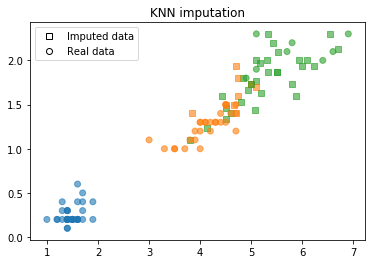

In [28]:
plot_imputation(X_train_knn, "KNN imputation")

In [29]:
# this is cheating because I'm not using a pipeline
# we would need to write a transformer that does the imputation
scores = cross_val_score(logreg, X_train_knn, y_train, cv=10)
np.mean(scores)

0.8783333333333333

In [30]:
asdf = np.arange(5)

In [31]:
from sklearn.ensemble import RandomForestRegressor


# this is just because I'm lazy and don't want to special-case the first iteration
X_imputed = SimpleImputer().fit_transform(X_train)

rf = RandomForestRegressor(n_estimators=100)

for i in range(10):
    last = X_imputed.copy()
    for feature in range(X_train.shape[1]):
        inds_not_f = np.arange(X_train.shape[1])
        inds_not_f = inds_not_f[inds_not_f != feature]
        f_missing = np.isnan(X_train[:, feature])
        if not np.any(f_missing):
            continue
        rf.fit(X_imputed[~f_missing][:, inds_not_f], X_train[~f_missing, feature])

        X_imputed[f_missing, feature] = rf.predict(X_imputed[f_missing][:, inds_not_f])

    # this would make more sense if we scaled the data beforehand
    if (np.linalg.norm(last - X_imputed)) < .5:
        print(i)
        break


4


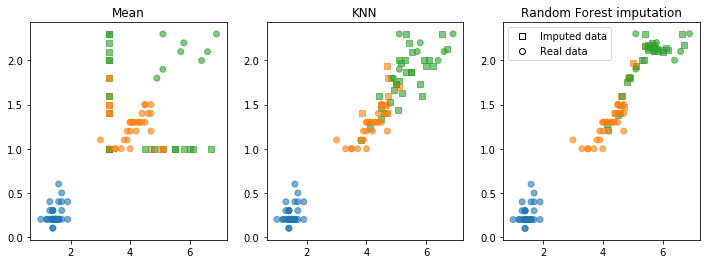

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
plot_imputation(X_mean_imp, "Mean", ax=axes[0])
plot_imputation(X_train_knn, "KNN", ax=axes[1])
plot_imputation(X_imputed, "Random Forest imputation", ax=axes[2])

In [33]:
scores = cross_val_score(logreg, X_imputed, y_train, cv=10)
np.mean(scores)

0.9172222222222223

# Feature Selection

In [34]:
from sklearn.datasets import load_boston

In [35]:
boston = load_boston()
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [36]:
from sklearn.preprocessing import scale
X_train_scaled = scale(X_train)
cov = np.cov(X_train_scaled, rowvar=False)

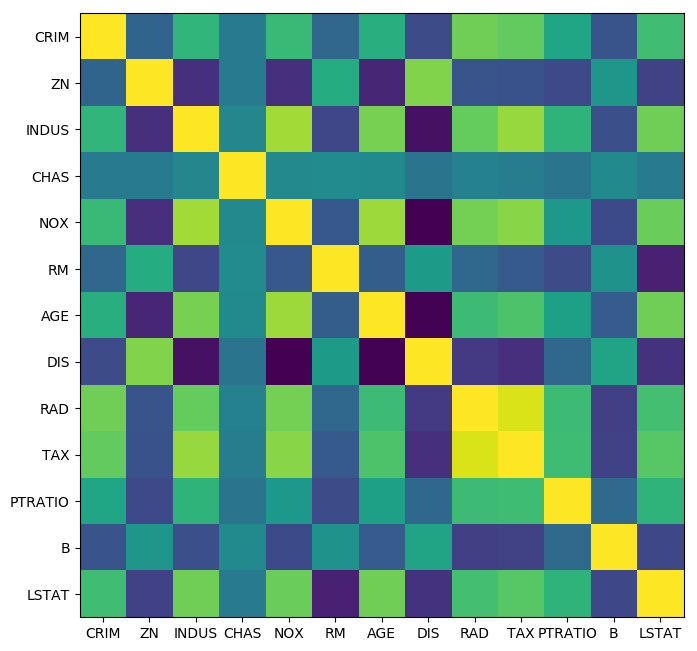

In [37]:
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(cov)
plt.xticks(range(X.shape[1]), boston.feature_names)
plt.yticks(range(X.shape[1]), boston.feature_names);

In [38]:
from scipy.cluster import hierarchy
order = np.array(hierarchy.dendrogram(hierarchy.ward(cov), no_plot=True)['ivl'], dtype="int")

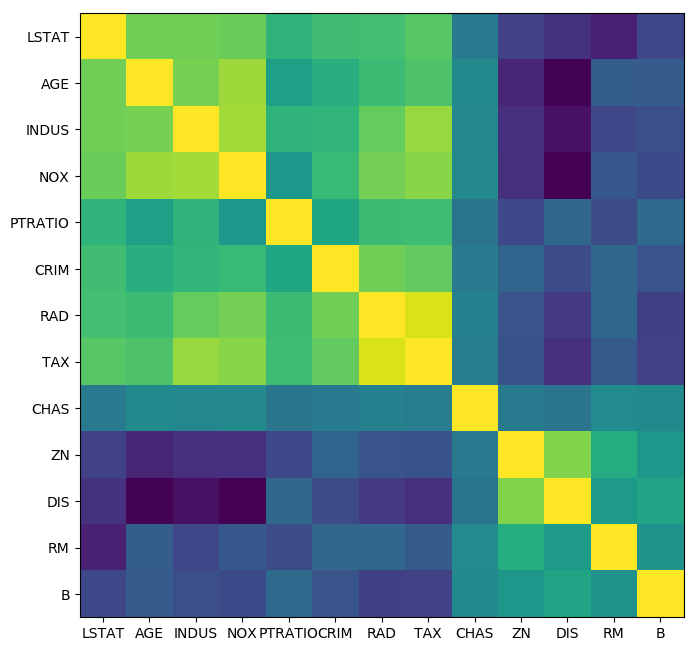

In [39]:
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(cov[order, :][:, order])
plt.xticks(range(X.shape[1]), boston.feature_names[order])
plt.yticks(range(X.shape[1]), boston.feature_names[order]);

# Supervised feature selection

In [40]:
from sklearn.feature_selection import f_regression
f_values, p_values = f_regression(X, y)

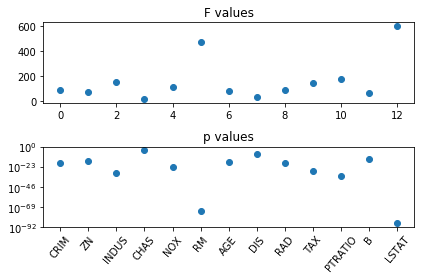

In [41]:
fig, ax = plt.subplots(2, 1)
ax[0].set_title("F values")
ax[0].plot(f_values, 'o')
ax[1].set_title("p values")
ax[1].plot(p_values, 'o')
ax[1].set_yscale("log")

ax[1].set_xticks(range(X.shape[1]))
ax[1].set_xticklabels(boston.feature_names, rotation=50);
fig.tight_layout()

In [42]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFpr
from sklearn.linear_model import RidgeCV

select = SelectKBest(k=2, score_func=f_regression)
select.fit(X_train, y_train)
print(X_train.shape)
print(select.transform(X_train).shape)

(379, 13)
(379, 2)


In [43]:
all_features = make_pipeline(StandardScaler(), RidgeCV())
select_2 = make_pipeline(StandardScaler(), SelectKBest(k=2, score_func=f_regression), RidgeCV())

In [44]:
np.mean(cross_val_score(all_features, X_train, y_train, cv=10))

0.71795885107509

In [45]:
np.mean(cross_val_score(select_2, X_train, y_train, cv=10))

0.6243625749168433

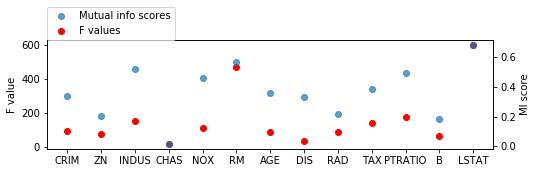

In [46]:
from sklearn.feature_selection import mutual_info_regression
scores = mutual_info_regression(X_train, y_train, discrete_features=[3])

fig = plt.figure(figsize=(8, 2))
line_f, = plt.plot(f_values, 'o', c='r')
plt.ylabel("F value")
ax2 = plt.twinx()
line_s, = ax2.plot(scores, 'o', alpha=.7)
ax2.set_ylabel("MI score")
plt.xticks(range(X.shape[1]), boston.feature_names)
plt.legend([line_s, line_f], ["Mutual info scores", "F values"], loc=(0, 1))

In [47]:
from sklearn.linear_model import LassoCV
X_train_scaled = scale(X_train)
lasso = LassoCV().fit(X_train_scaled, y_train)
print(lasso.coef_)

[-0.889  0.951 -0.085  0.589 -1.686  2.644 -0.148 -2.795  1.698 -1.614
 -2.131  0.72  -3.608]


/Users/gceran/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


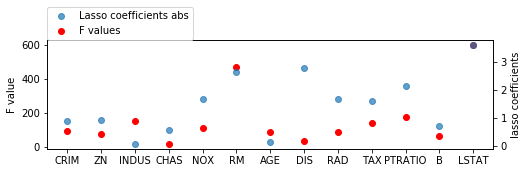

In [48]:
fig = plt.figure(figsize=(8, 2))
line_f, = plt.plot(f_values, 'o', c='r')
plt.ylabel("F value")
ax2 = plt.twinx()
ax2.set_ylabel("lasso coefficients")
line_s, = ax2.plot(np.abs(lasso.coef_), 'o', alpha=.7)
plt.xticks(range(X.shape[1]), boston.feature_names)
plt.legend([line_s, line_f], ["Lasso coefficients abs", "F values"], loc=(0, 1))

In [49]:
from sklearn.linear_model import Lasso
X_train_scaled = scale(X_train)
lasso = Lasso().fit(X_train_scaled, y_train)
print(lasso.coef_)

[-0.     0.    -0.     0.    -0.     2.529 -0.    -0.    -0.    -0.228
 -1.701  0.132 -3.606]


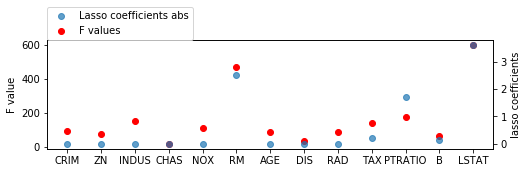

In [50]:
fig = plt.figure(figsize=(8, 2))
line_f, = plt.plot(f_values, 'o', c='r')
plt.ylabel("F value")
ax2 = plt.twinx()
ax2.set_ylabel("lasso coefficients")
line_s, = ax2.plot(np.abs(lasso.coef_), 'o', alpha=.7)
plt.xticks(range(X.shape[1]), boston.feature_names)
plt.legend([line_s, line_f], ["Lasso coefficients abs", "F values"], loc=(0, 1))

In [51]:
X_train.shape

(379, 13)

In [52]:
from sklearn.feature_selection import SelectFromModel
select_lassocv = SelectFromModel(LassoCV())
select_lassocv.fit(X_train, y_train)
print(select_lassocv.transform(X_train).shape)

(379, 11)


/Users/gceran/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [53]:
pipe_lassocv = make_pipeline(StandardScaler(), select_lassocv, RidgeCV())
np.mean(cross_val_score(pipe_lassocv, X_train, y_train, cv=10))

/Users/gceran/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/gceran/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/gceran/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/gceran/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv'

0.7171231551882247

In [54]:
np.mean(cross_val_score(all_features, X_train, y_train, cv=10))

0.71795885107509

In [55]:
# could grid-search alpha in lasso
select_lasso = SelectFromModel(Lasso())
pipe_lasso = make_pipeline(StandardScaler(), select_lasso, RidgeCV())
np.mean(cross_val_score(pipe_lasso, X_train, y_train, cv=10))

0.6701928131455434

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# create ranking among all features by selecting only one
rfe = RFE(LinearRegression(), n_features_to_select=1)
rfe.fit(X_train_scaled, y_train)
rfe.ranking_

array([ 9,  8, 13, 11,  5,  2, 12,  4,  7,  6,  3, 10,  1])

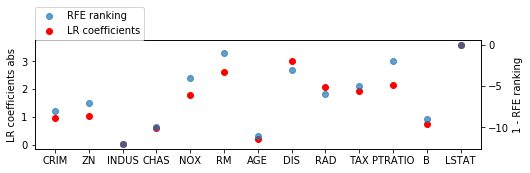

In [57]:
lr = LinearRegression().fit(X_train_scaled, y_train)
fig = plt.figure(figsize=(8, 2))
line_f, = plt.plot(np.abs(lr.coef_), 'o', c='r')
plt.ylabel("LR coefficients abs")
ax2 = plt.twinx()
ax2.set_ylabel("1 - RFE ranking")
line_s, = ax2.plot(1 - rfe.ranking_, 'o', alpha=.7)
plt.xticks(range(X.shape[1]), boston.feature_names)
plt.legend([line_s, line_f], ["RFE ranking", "LR coefficients"], loc=(0, 1))

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV

rfe = RFECV(LinearRegression(), cv=10)
rfe.fit(X_train_scaled, y_train)
print(rfe.support_)
print(boston.feature_names[rfe.support_])

[ True  True False  True  True  True False  True  True  True  True  True
  True]
['CRIM' 'ZN' 'CHAS' 'NOX' 'RM' 'DIS' 'RAD' 'TAX' 'PTRATIO' 'B' 'LSTAT']


In [59]:
pipe_rfe_ridgecv = make_pipeline(StandardScaler(), RFECV(LinearRegression(), cv=10), RidgeCV())
np.mean(cross_val_score(pipe_rfe_ridgecv, X_train, y_train, cv=10))

0.7102178436288838

In [60]:
from sklearn.preprocessing import PolynomialFeatures
pipe_rfe_ridgecv = make_pipeline(StandardScaler(), PolynomialFeatures(), RFECV(LinearRegression(), cv=10), RidgeCV())
np.mean(cross_val_score(pipe_rfe_ridgecv, X_train, y_train, cv=10))

0.8412260511536424

In [61]:
pipe_rfe_ridgecv.fit(X_train, y_train)
print(pipe_rfe_ridgecv.named_steps['rfecv'].support_)

[False  True  True  True False  True  True  True False  True  True False
  True  True False  True  True  True  True False False False  True  True
  True False False  True  True False  True False False False False  True
  True  True  True  True False False  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True False  True  True
 False False  True  True  True  True  True False False False  True  True
 False  True  True False False False False  True  True False  True  True
  True  True False False  True  True  True  True  True  True  True  True
  True False  True False  True False False False  True]


In [63]:
#You need to first install mlxtend
#conda install mlxtend --channel conda-forge
from mlxtend.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(LinearRegression(), forward=False, k_features=7)
sfs.fit(X_train_scaled, y_train)

SequentialFeatureSelector(clone_estimator=True, cv=5,
             estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
             floating=False, forward=False, k_features=7, n_jobs=1,
             pre_dispatch='2*n_jobs', scoring=None, verbose=0)

In [64]:
print(sfs.k_feature_idx_)
print(boston.feature_names[np.array(sfs.k_feature_idx_)])

(1, 4, 5, 7, 9, 10, 12)
['ZN' 'NOX' 'RM' 'DIS' 'TAX' 'PTRATIO' 'LSTAT']


In [65]:
sfs.k_score_

0.7250861222829649